# Project name:: Churn Analysis
## Contribution:: Individual
## Member:: Gurvindar Kaur


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_excel("Desktop//Data Science//churn.xlsx")

In [6]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


# Data Visualisation, to understand data

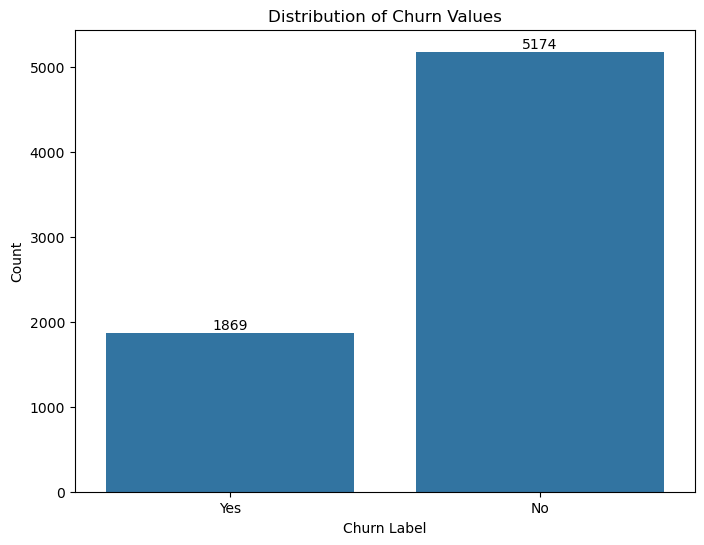

In [8]:
# Visualize the distribution of churn values
plt.figure(figsize=(8, 6))
a=sns.countplot(x='Churn Label', data=df)
a.bar_label(a.containers[0])
plt.title('Distribution of Churn Values')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.show()

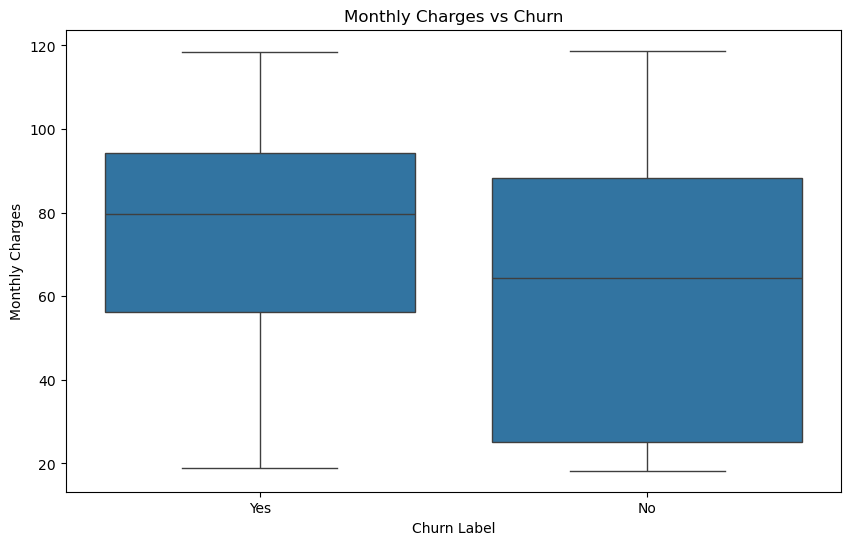

In [9]:
# Visualize the relationship between Monthly Charges and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn Label')
plt.ylabel('Monthly Charges')
plt.show()

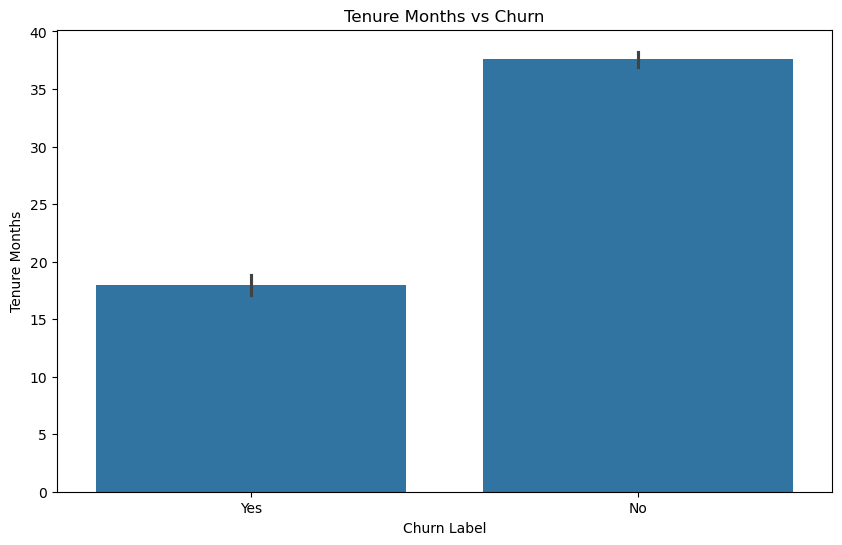

In [10]:
# Visualize the relationship between Tenure Months and Churn
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn Label', y='Tenure Months', data=df)
plt.title('Tenure Months vs Churn')
plt.xlabel('Churn Label')
plt.ylabel('Tenure Months')
plt.show()

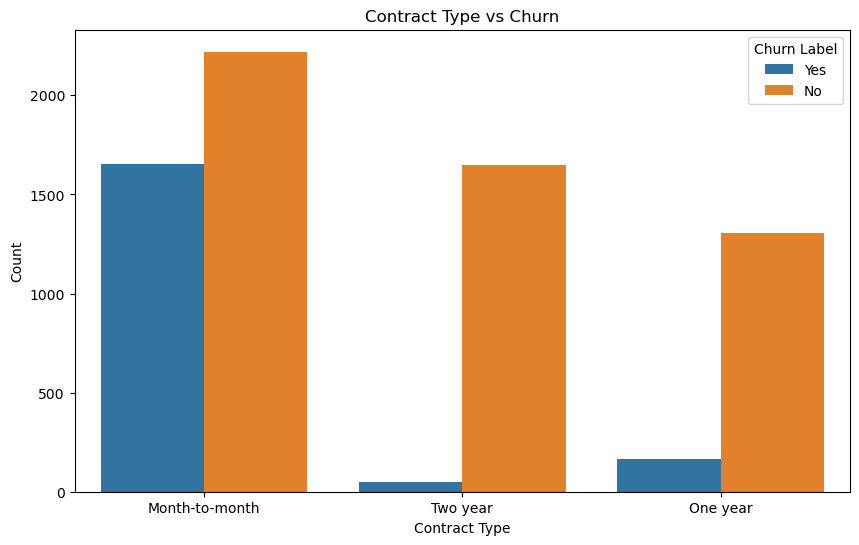

In [11]:
# Visualize the relationship between Contract type and Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

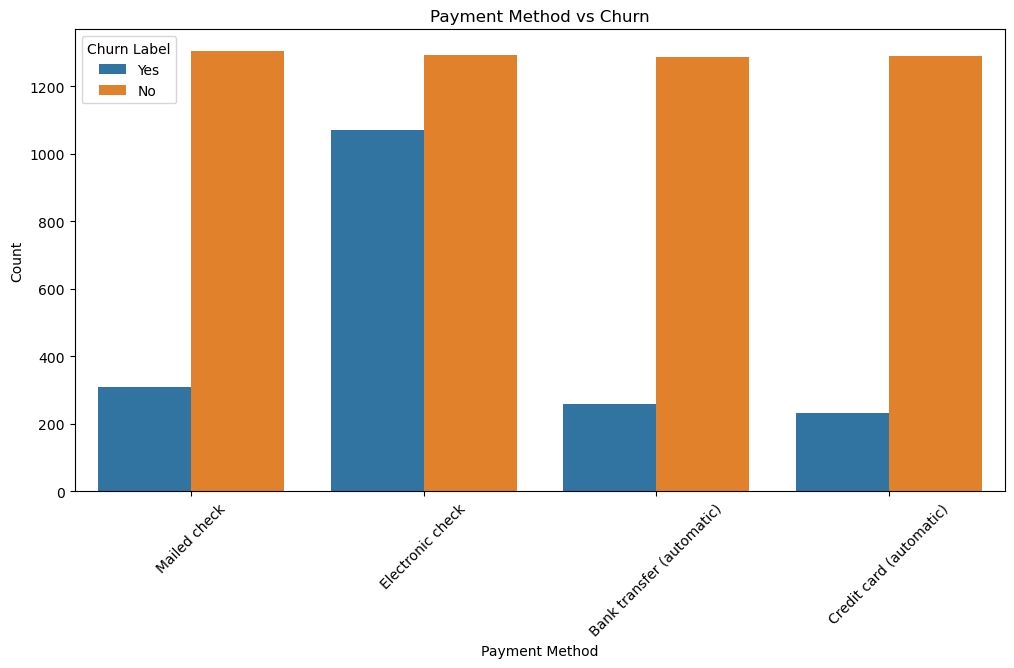

In [12]:
# Visualize the relationship between Payment Method and Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment Method', hue='Churn Label', data=df)
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Data cleaning and Transformation

In [14]:
df.drop(['CustomerID',	'Count', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Paperless Billing', 'Payment Method', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies'], axis=1, inplace=True) 

In [15]:
# data is for only USA and state California, I am droping country, state and city as well for this reason.
df.drop(['Country', 'State','City'], axis=1, inplace=True)

In [16]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service', 'Contract',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [17]:
df.columns = df.columns.str.replace('Senior Citizen', 'Senior_Cit')
df.columns = df.columns.str.replace('Tenure Months', 'Tenure_Months')
df.columns = df.columns.str.replace('Phone Service', 'Phone_Serv')
df.columns = df.columns.str.replace('Multiple Lines', 'Multiple_Lines')

df.columns = df.columns.str.replace('Internet Service', 'Internet_Serv')
df.columns = df.columns.str.replace('Monthly Charges','Monthly_Charges')
df.columns = df.columns.str.replace('Total Charges','Total_Charges')
df.columns = df.columns.str.replace('Churn Label','Churn_Label')

df.columns = df.columns.str.replace('Churn Value','Churn_Value')
df.columns = df.columns.str.replace('Churn Score','Churn_Score')
df.columns = df.columns.str.replace('Churn Reason','Churn_Reason')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           7043 non-null   object 
 1   Senior_Cit       7043 non-null   object 
 2   Partner          7043 non-null   object 
 3   Dependents       7043 non-null   object 
 4   Tenure_Months    7043 non-null   int64  
 5   Phone_Serv       7043 non-null   object 
 6   Multiple_Lines   7043 non-null   object 
 7   Internet_Serv    7043 non-null   object 
 8   Contract         7043 non-null   object 
 9   Monthly_Charges  7043 non-null   float64
 10  Total_Charges    7043 non-null   object 
 11  Churn_Label      7043 non-null   object 
 12  Churn_Value      7043 non-null   int64  
 13  Churn_Score      7043 non-null   int64  
 14  CLTV             7043 non-null   int64  
 15  Churn_Reason     1869 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory usage: 880.5+ KB


In [19]:
df.isnull().any().sum()

1

In [20]:
df['Churn_Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [21]:
# Churn reason divided in Competitor, Dissatisfaction, Other, and Price.

for index,row in df.iterrows():
    if row['Churn_Reason']=='Competitor made better offer':
        df.at[index,'Churn_Reason']='Competitor'
    elif row['Churn_Reason']=='Competitor had better devices':
        df.at[index,'Churn_Reason']='Competitor'
    elif row['Churn_Reason']=='Moved':
        df.at[index,'Churn_Reason']='Other'
    elif row['Churn_Reason']=='Competitor offered higher download speeds':
        df.at[index,'Churn_Reason']='Competitor'
    elif row['Churn_Reason']=='Competitor offered more data':
        df.at[index,'Churn_Reason']='Competitor'
    elif row['Churn_Reason']=='Price too high':
        df.at[index,'Churn_Reason']='Price'
    elif row['Churn_Reason']=='Product dissatisfaction':
        df.at[index,'Churn_Reason']='Dissatisfaction'

    elif row['Churn_Reason']=='Lack of self-service on Website':
        df.at[index,'Churn_Reason']='Dissatisfaction'
    elif row['Churn_Reason']=='Service dissatisfaction':
        df.at[index,'Churn_Reason']='Dissatisfaction'
    elif row['Churn_Reason']=='Limited range of services':
        df.at[index,'Churn_Reason']='Dissatisfaction'
    elif row['Churn_Reason']=='Network reliability':
        df.at[index,'Churn_Reason']='Dissatisfaction'
        
    elif row['Churn_Reason']=='Lack of affordable download/upload speed':
        df.at[index,'Churn_Reason']='Price'
    elif row['Churn_Reason']=='Long distance charges':
        df.at[index,'Churn_Reason']='Price'
    elif row['Churn_Reason']=='Extra data charges':
        df.at[index,'Churn_Reason']='Price'

    elif row['Churn_Reason']=="Don't know":
        df.at[index,'Churn_Reason']='Other'
    elif row['Churn_Reason']=='Deceased':
        df.at[index,'Churn_Reason']='Other'


    elif row['Churn_Reason']=='Poor expertise of online support':
        df.at[index,'Churn_Reason']='Dissatisfaction'
    elif row['Churn_Reason']=='Poor expertise of phone support':
        df.at[index,'Churn_Reason']='Dissatisfaction'
    elif row['Churn_Reason']=='Attitude of service provider':
        df.at[index,'Churn_Reason']='Dissatisfaction'
    elif row['Churn_Reason']=='Attitude of support person':
        df.at[index,'Churn_Reason']='Dissatisfaction'
    

In [22]:
df['Churn_Reason'].value_counts()

Churn_Reason
Dissatisfaction    792
Competitor         621
Price              243
Other              213
Name: count, dtype: int64

<Axes: xlabel='Churn_Reason', ylabel='count'>

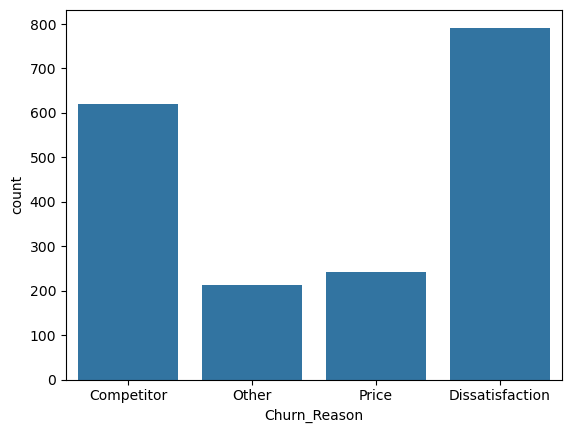

In [23]:
sns.countplot(data=df, x= 'Churn_Reason')

In [24]:
df['Churn_Label'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df['Churn_Label'].replace({'Yes':1,'No':0},inplace=True)

In [26]:
df['Churn_Label'].unique()

array([1, 0], dtype=int64)

In [27]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [29]:
df["Total_Charges"] = pd.to_numeric(df["Total_Charges"],errors='coerce')

In [30]:
df['Senior_Cit'].unique()


array(['No', 'Yes'], dtype=object)

In [31]:
df['Partner'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df['Senior_Cit'].replace({'Yes':1,'No':0},inplace=True)
df['Partner'].replace({'Yes':1,'No':0},inplace=True)
df['Dependents'].replace({'Yes':1,'No':0},inplace=True)
df['Phone_Serv'].replace({'Yes':1,'No':0},inplace=True)

# Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
df['Multiple_Lines'].replace({'Yes':1,'No':0, 'No phone service':0 },inplace=True)
df['Internet_Serv'].replace({'DSL':1, 'Fiber optic':1,'No':0 },inplace=True)

# Multicolinearity

In [34]:
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Gender', 'Senior_Cit', 'Partner', 'Dependents', 'Tenure_Months',
       'Phone_Serv', 'Multiple_Lines', 'Internet_Serv', 'Monthly_Charges',
       'Total_Charges', 'Churn_Label', 'Churn_Value', 'Churn_Score', 'CLTV'],
      dtype='object')

In [35]:
correlation=numeric_features.corr()
correlation

,Gender,Senior_Cit,Partner,Dependents,Tenure_Months,Phone_Serv,Multiple_Lines,Internet_Serv,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV
Gender,1.000000,-0.001874,-0.001808,0.005229,0.005106,-0.006488,-0.008414,-0.006026,-0.014569,0.000048,-0.008612,-0.008612,0.000311,-0.006851
Senior_Cit,-0.001874,1.000000,0.016479,-0.174396,0.016567,0.008576,0.142948,0.182742,0.220173,0.102411,0.150889,0.150889,0.102181,-0.003167
Partner,-0.001808,0.016479,1.000000,0.363430,0.379697,0.017706,0.142057,-0.000615,0.096848,0.319072,-0.150448,-0.150448,-0.111013,0.137859
Dependents,0.005229,-0.174396,0.363430,1.000000,0.131376,0.000625,-0.027510,-0.172110,-0.144206,0.032184,-0.248542,-0.248542,-0.174950,0.058222
Tenure_Months,0.005106,0.016567,0.379697,0.131376,1.000000,0.008448,0.331941,0.039062,0.247900,0.825880,-0.352229,-0.352229,-0.224987,0.396406
Phone_Serv,-0.006488,0.008576,0.017706,0.000625,0.008448,1.000000,0.279690,-0.172209,0.247398,0.113008,0.011942,0.011942,0.024136,0.023015
Multiple_Lines,-0.008414,0.142948,0.142057,-0.027510,0.331941,0.279690,1.000000,0.210564,0.490434,0.469042,0.040102,0.040102,0.043252,0.133568
Internet_Serv,-0.006026,0.182742,-0.000615,-0.172110,0.039062,-0.172209,0.210564,1.000000,0.763557,0.374878,0.227890,0.227890,0.145542,0.011521
Monthly_Charges,-0.014569,0.220173,0.096848,-0.144206,0.247900,0.247398,0.490434,0.763557,1.000000,0.651065,0.193356,0.193356,0.133754,0.098693
Total_Charges,0.000048,0.102411,0.319072,0.032184,0.825880,0.113008,0.469042,0.374878,0.651065,1.000000,-0.199484,-0.199484,-0.124312,0.341837


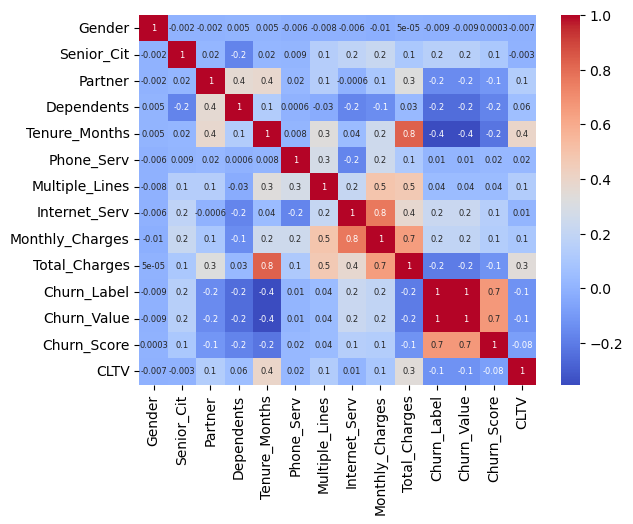

In [36]:

sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt='.1g', annot_kws={"size":6})
plt.figsize=(20,20)

plt.show()

#### Tenure_Months has a strong positive correlation with Total_Charges (0.825880), indicating that longer-tenured customers tend to have higher total charges.
#### Internet_Serv has a notable positive correlation with Monthly_Charges (0.763557), suggesting that customers with internet service tend to have higher monthly charges.
#### Churn_Label and Churn_Value are perfectly correlated (1.000000), as expected since they represent the same concept.
#### removing columns with high correlation can help reduce multicollinearity, which can improve the performance and interpretability of models. Multicollinearity occurs when two or more predictor variables are highly correlated, making it difficult to determine the individual effect of each variable.






In [38]:
# removing highly correlated col.
df.drop(['Tenure_Months', 'Internet_Serv', 'Churn_Label'], axis=1, inplace= True)



In [39]:
#removing churn reason and churn score column
df.drop(['Churn_Score', 'Churn_Reason'], axis=1, inplace= True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           7043 non-null   int64  
 1   Senior_Cit       7043 non-null   int64  
 2   Partner          7043 non-null   int64  
 3   Dependents       7043 non-null   int64  
 4   Phone_Serv       7043 non-null   int64  
 5   Multiple_Lines   7043 non-null   int64  
 6   Contract         7043 non-null   object 
 7   Monthly_Charges  7043 non-null   float64
 8   Total_Charges    7032 non-null   float64
 9   Churn_Value      7043 non-null   int64  
 10  CLTV             7043 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 605.4+ KB


In [41]:
df['Churn_Value'].value_counts()

Churn_Value
0    5174
1    1869
Name: count, dtype: int64

In [42]:
df['Churn_Value'].isnull().any().sum()

0

# Encoding and Missing value treatment

In [44]:
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')


In [45]:
df['Total_Charges']= imputer_num.fit_transform(df[['Total_Charges']])


In [46]:
df.isnull().sum()

Gender             0
Senior_Cit         0
Partner            0
Dependents         0
Phone_Serv         0
Multiple_Lines     0
Contract           0
Monthly_Charges    0
Total_Charges      0
Churn_Value        0
CLTV               0
dtype: int64

In [47]:
cat_features=df.select_dtypes(include=[object])
cat_features.columns

Index(['Contract'], dtype='object')

In [48]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)

# Encode the categorical 'contract' feature

Contract_encoded=LabelEncoder()
df['Contract'] = Contract_encoded.fit_transform(df['Contract'])


df=df.dropna()


In [49]:
# Mapping encoded values back to original values
encoded_Contract = df['Contract'].unique()
decoded_Contract = Contract_encoded.inverse_transform(encoded_Contract)

# Creating a dictionary for easy lookup
Contract_mapping = dict(zip(encoded_Contract, decoded_Contract))

print(Contract_mapping)

{0: 'Month-to-month', 2: 'Two year', 1: 'One year'}


# Train test split

In [51]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = df.drop(columns=['Churn_Value'])
y = df['Churn_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [54]:
from sklearn.pipeline import Pipeline

# Define the pipelines for each classifier
pipelines = {
    'logistic_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ])
}


In [55]:
# Define the parameter grids for each classifier
param_grids = {
    'logistic_regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear']
    },
    'decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'random_forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }
}

In [56]:
# Perform grid search cross-validation for each classifier
best_estimators = {}
for name in pipelines.keys():
    grid_search = GridSearchCV(pipelines[name], param_grids[name], cv=5)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")


Best parameters for logistic_regression: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
Best parameters for decision_tree: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best parameters for random_forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


# Model Evaluation

In [58]:
# Evaluate the best models on the test set and generate classification reports
best_model_name = None
best_model_accuracy = 0
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = name

    best_model = best_estimators[best_model_name]
      
    print(f"Accuracy of {name}: {accuracy}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

    
    # Create a DataFrame to compare true and predicted values
    comparison_df = pd.DataFrame({
        'True Values': y_test,
        'Predicted Values': y_pred
        })
    # Display the first few rows of true vs predicted values
    print(comparison_df.head())


Accuracy of logistic_regression: 0.7899219304471257
Classification Report for logistic_regression:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1009
           1       0.66      0.53      0.59       400

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

      True Values  Predicted Values
185             1                 1
2715            0                 0
3825            0                 0
1807            1                 1
132             1                 0
Accuracy of decision_tree: 0.7721788502484032
Classification Report for decision_tree:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1009
           1       0.61      0.54      0.57       400

    accuracy                           0.77      1409
   macro avg       0.72      0.70      0.71      1409

In [59]:
#best model with accuracy
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy}")

The best model is random_forest with an accuracy of 0.7998580553584103


# New Predictions

In [61]:
sample_data = df.sample(n=5, random_state=42)

In [62]:
sample_data

,Gender,Senior_Cit,Partner,Dependents,Phone_Serv,Multiple_Lines,Contract,Monthly_Charges,Total_Charges,Churn_Value,CLTV
185,0,0,0,0,1,0,0,85.9,1269.55,1,3579
2715,1,0,1,0,1,1,0,56.8,1074.65,0,5558
3825,0,0,0,0,1,0,0,20.0,40.90,0,2237
1807,1,1,1,0,1,0,0,84.2,519.15,1,5834
132,1,0,0,0,1,1,0,104.8,4131.95,1,3492


In [63]:
X_new = sample_data.drop(columns=['Churn_Value'])
y_new = sample_data['Churn_Value']


In [64]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(max_depth=10))])

In [65]:

sample_pred = best_model.predict(X_new)
accu = accuracy_score(y_new, sample_pred)
print(f'sample predictions using{best_model_name} with prediction accuracy of {accu}')
comparison_df = pd.DataFrame({
        'True Values': y_new,
        'Predicted Values': sample_pred
        })
# Display the first few rows of true vs predicted values
print(comparison_df.head())

  

sample predictions usingrandom_forest with prediction accuracy of 0.8
      True Values  Predicted Values
185             1                 0
2715            0                 0
3825            0                 0
1807            1                 1
132             1                 1


## Thank you